### Faraday Institute MSM Fast Start affiliates SCOPUS miner

In [1]:
import pandas as pd, json

Affiliate list

In [12]:
members=[{'f':'Denes','l':'Csala','u':'Lancaster University'},\
         {'f':'Harry','l':'Hoster','u':'Lancaster University'},\
         {'f':'Gregory','l':'Offer','u':'Imperial College London'},\
         {'f':'Monica','l':'Marinescu','u':'Imperial College London'},\
         {'f':'Billy','l':'Wu','u':'Imperial College London'},\
         {'f':'Aron','l':'Walsh','u':'Imperial College London'},\
         {'f':'Sam','l':'Cooper','u':'Imperial College London'},\
         {'f':'Dhammika','l':'Widanage','u':'University of Warwick'},\
         {'f':'Emma','l':'Kendrick','u':'University of Birmingham'},\
         {'f':'James','l':'Marco','u':'University of Warwick'},\
         {'f':'Charles','l':'Monroe','u':'University of Oxford'},\
         {'f':'David','l':'Howey','u':'University of Oxford'},\
         {'f':'Jon','l':'Chapman','u':'University of Oxford'},\
         {'f':'Colin','l':'Please','u':'University of Oxford'},\
         {'f':'Denis','l':'Kramer','u':'University of Southampton'},\
         {'f':'Chris-Kriton','l':'Skylaris','u':'University of Southampton'},\
         {'f':'Giles','l':'Richardson','u':'University of Southampton'},\
         {'f':'Dan','l':'Brett','u':'University College London'},\
         {'f':'David','l':'Scanlon','u':'University College London'},\
         {'f':'Paul','l':'Shearing','u':'University College London'},\
         {'f':'Saiful','l':'Islam','u':'University of Bath'},\
         {'f':'Benjamin','l':'Morgan','u':'University of Bath'}]

Initialize SCOPUS API key

In [13]:
key_file = open("key", "r") #IP-based, at uni
#key_file = open("key2", "r") #at home
key = key_file.read()
from pyscopus.scopus import Scopus
pyscopus = Scopus(key)

Retrieve SCOPUS author IDs

In [14]:
authors=[]
for i in members:
    print i
    query_dict = {'affil': i['u'], 'authfirst': i['f'], 'authlast': i['l']}
    author_results = pyscopus.search_author(query_dict);
    if len(author_results)>0: scopusid=author_results[0]['author_id']
    else: scopusid='0000'
    i['s']=scopusid
    authors.append(i)

{'u': 'Lancaster University', 'l': 'Csala', 'f': 'Denes'}
A total number of  1  records for the query.
            affiliation    author_id  document_count         name
0  Lancaster University  56223929700               6  Denes Csala
{'u': 'Lancaster University', 'l': 'Hoster', 'f': 'Harry'}
A total number of  1  records for the query.
            affiliation   author_id  document_count                name
0  Lancaster University  6701895930              87  Harry Ernst Hoster
{'u': 'Imperial College London', 'l': 'Offer', 'f': 'Gregory'}
A total number of  1  records for the query.
               affiliation    author_id  document_count                 name
0  Imperial College London  23098060000              72  Gregory James Offer
{'u': 'Imperial College London', 'l': 'Marinescu', 'f': 'Monica'}
A total number of  1  records for the query.
               affiliation    author_id  document_count                 name
0  Imperial College London  36701631300              17  Monica M. 

In [15]:
pd.DataFrame(authors)

,f,l,s,u
0,Denes,Csala,56223929700,Lancaster University
1,Harry,Hoster,6701895930,Lancaster University
2,Gregory,Offer,23098060000,Imperial College London
3,Monica,Marinescu,36701631300,Imperial College London
4,Billy,Wu,7403591460,Imperial College London
5,Aron,Walsh,35315151400,Imperial College London
6,Sam,Cooper,56167913500,Imperial College London
7,Dhammika,Widanage,16317933200,University of Warwick
8,Emma,Kendrick,9844777200,University of Birmingham
9,James,Marco,16305142700,University of Warwick


Retrieve SCOPUS publication IDs for each author

In [16]:
pubs=[]
for i in authors:
    i['pubs']=pyscopus.search_author_publication(i['s'])
    pubs.append(i)

A toal number of  6  records for author  56223929700
A toal number of  87  records for author  6701895930
A toal number of  72  records for author  23098060000
A toal number of  17  records for author  36701631300
A toal number of  17  records for author  7403591460
A toal number of  268  records for author  35315151400
A toal number of  7  records for author  56167913500
A toal number of  26  records for author  16317933200
A toal number of  53  records for author  9844777200
A toal number of  80  records for author  16305142700
A toal number of  60  records for author  7006243205
A toal number of  75  records for author  34267561800
A toal number of  143  records for author  7403045089
A toal number of  109  records for author  7003528228
A toal number of  39  records for author  7203031715
A toal number of  89  records for author  6603502266
A toal number of  50  records for author  7202431002
A toal number of  209  records for author  13805905800
A toal number of  145  records for 

Retrieve abstracts for each publication ID for each author

In [17]:
import json

In [15]:
file('f1.json','w').write(json.dumps(pubs))

In [18]:
abstracts=[]
minyear=2011
for i in pubs:
    print i['f'],i['l']
    p=[]
    for j in i['pubs']:
        if int(j['cover_date'][:4])>minyear:
            try:
                p.append({'title':j['title'],'date':j['cover_date'],'journal':j['publication_name']\
                      ,'abstract':pyscopus.retrieve_abstract(j['scopus_id'],show=False)['text']});
            except:
                p.append({'title':j['title'],'date':j['cover_date'],'journal':j['publication_name']\
                      ,'abstract':''});
    i['abs']=p
    abstracts.append(i)

Denes Csala
Fail to find abstract!
Harry Hoster
Fail to find abstract!
Fail to find abstract!
Gregory Offer
Monica Marinescu
Billy Wu
Aron Walsh
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Sam Cooper
Dhammika Widanage
Emma Kendrick
James Marco
Fail to find abstract!
Charles Monroe
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
David Howey
Fail to find abstract!
Fail to find abstract!
Jon Chapman
Fail to find abstract!
Colin Please
Denis Kramer
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Chris-Kriton Skylaris
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Fail to find abstract!
Giles Richardson
Dan Br

In [19]:
abs2=[]
for i in abstracts:
    j=dict(i)
    j.pop('pubs');
    abs2.append(j)

In [83]:
abs3={}
for i in abs2:
    if i['l'] not in abs3:
        print i['l'] 
        abs3[i['l']]=i

Csala
Hoster
Offer
Marinescu
Wu
Walsh
Cooper
Widanage
Kendrick
Marco
Monroe
Howey
Chapman
Please
Kramer
Skylaris
Richardson
Brett
Scanlon
Shearing
Islam
Morgan


In [89]:
# Simple WordCloud
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

In [96]:
abs4={}
for i in abs3:
    abs4[i]=''
    for j in abs3[i]['abs']:
        abs4[i]=abs4[i]+' '+j['abstract']

Cooper


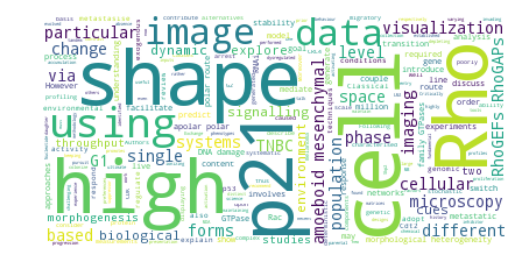

Scanlon


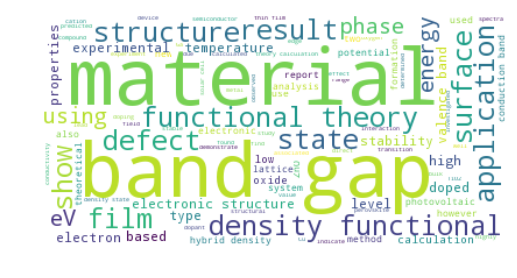

Please


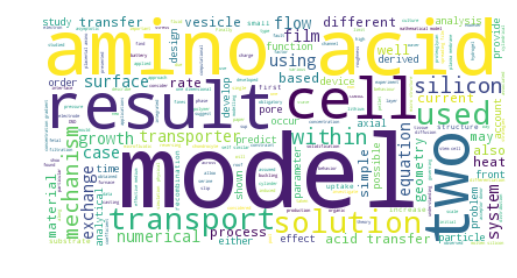

Marco


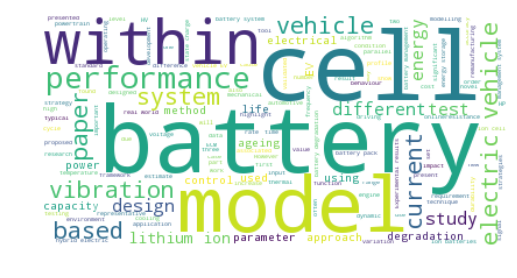

Offer


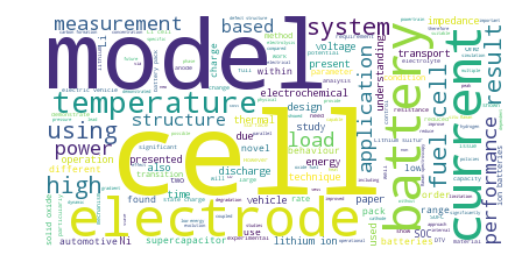

Brett


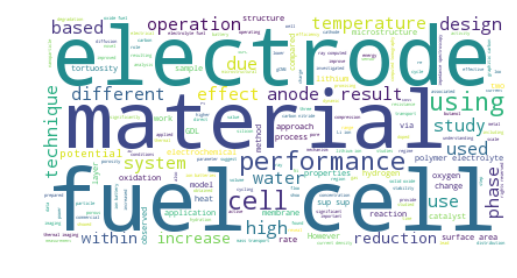

Wu


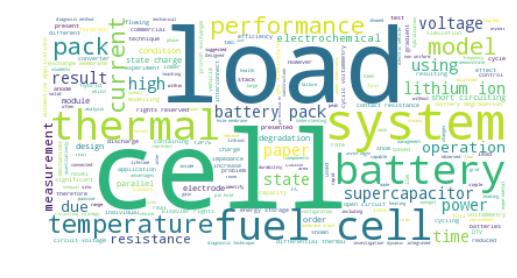

Skylaris


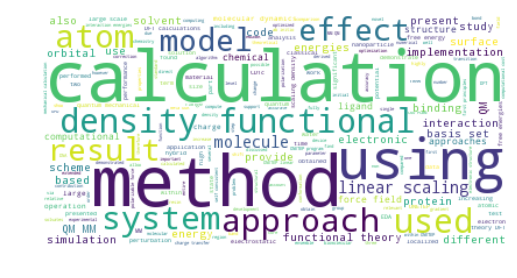

Howey


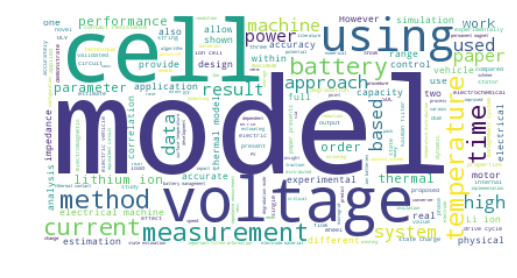

Chapman


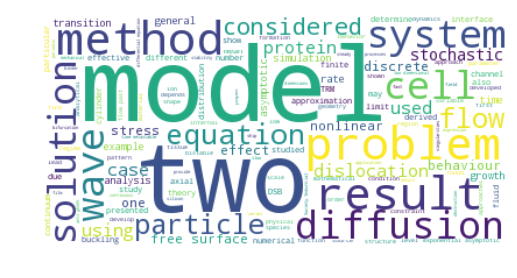

Widanage


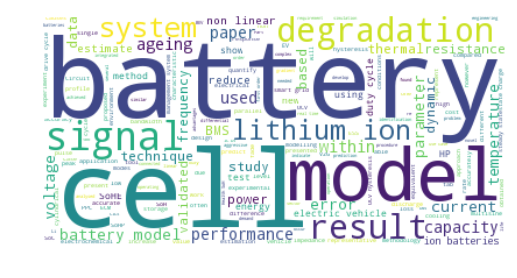

Morgan


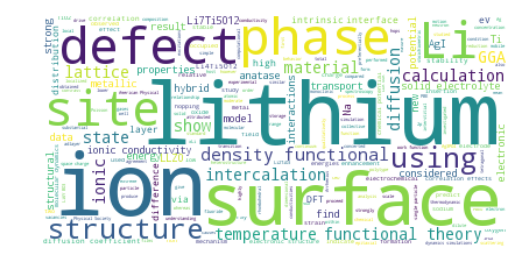

Kendrick


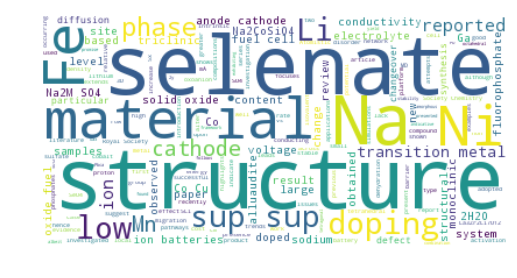

Richardson


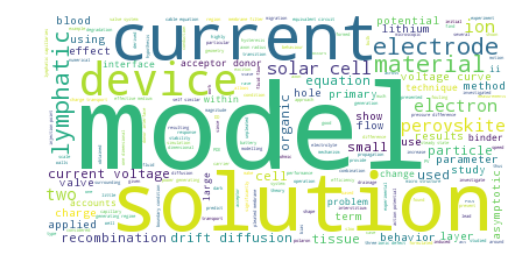

Marinescu


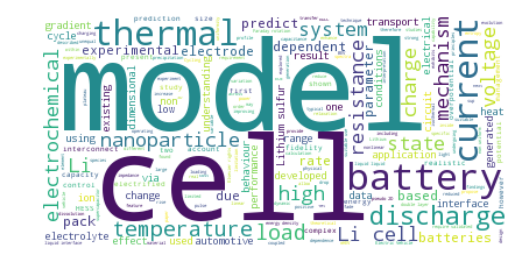

Hoster


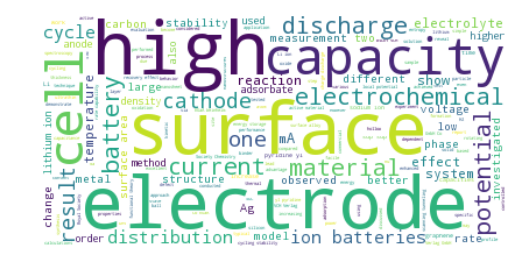

Kramer


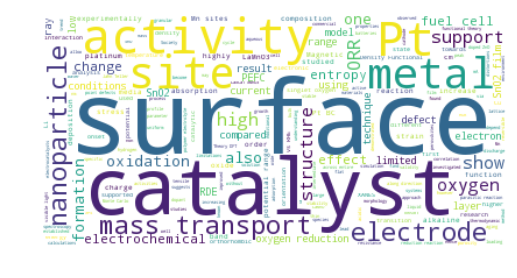

Csala


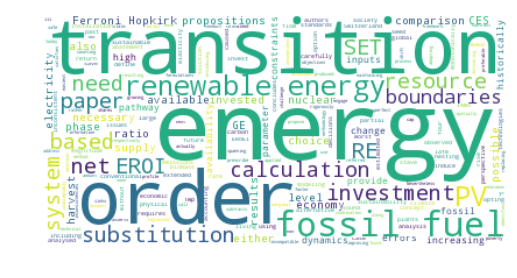

Walsh


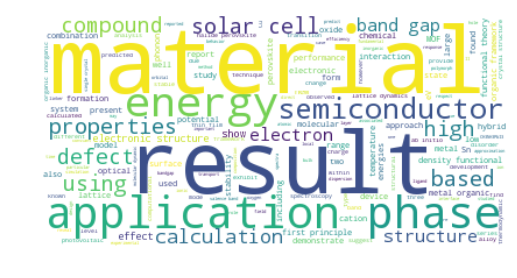

Shearing


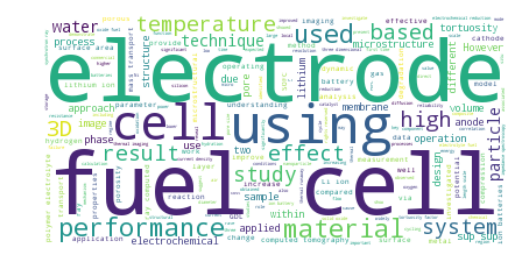

Monroe


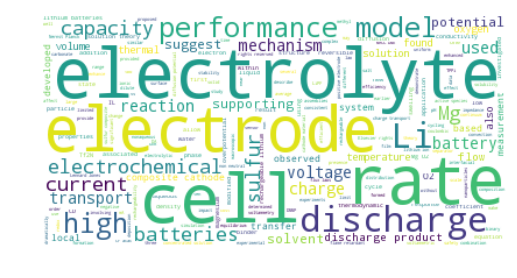

Islam


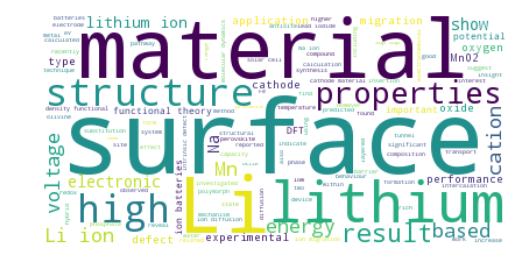

In [131]:
#set the stopwords list
sw2={'inf','inf'}
for i in abs4:
    print i
    text=abs4[i]
    wordcloud = WordCloud(relative_scaling = 0.1, background_color="white",
                          stopwords = set(STOPWORDS.union(sw2))
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()